<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-e97250869b82>:60: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

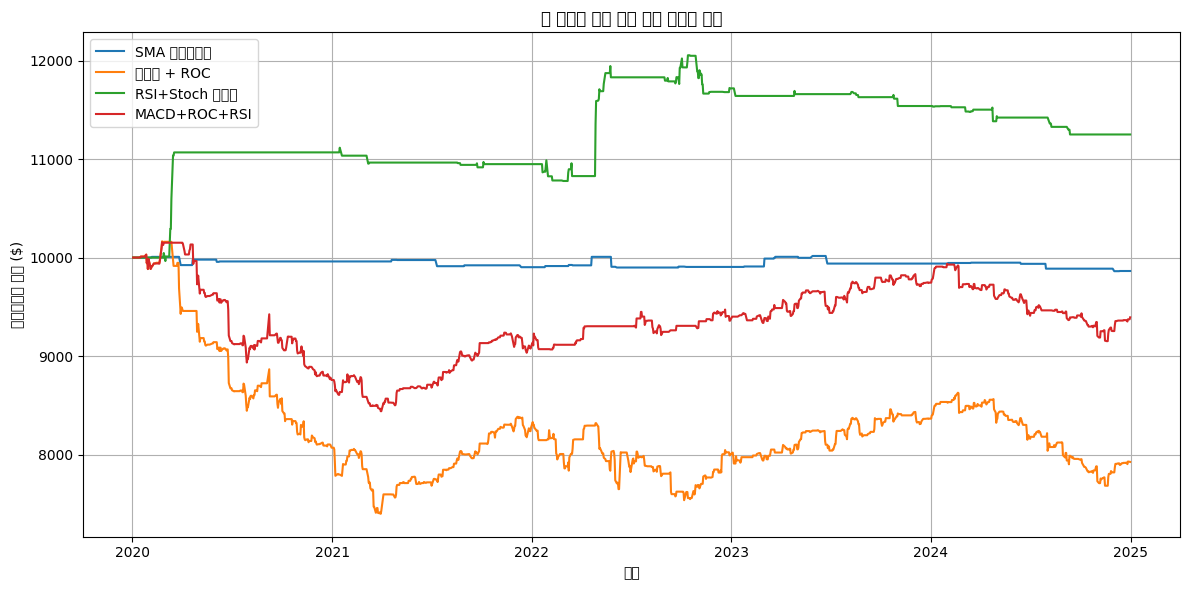

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("M7_stock_data_2020_2024.csv", index_col="Date", parse_dates=True)

# 누락값 제거
df = df.dropna(subset=["SMA_50", "SMA_200", "Momentum_10", "ROC_10", "RSI_14", "MACD", "Stoch_K"])
df = df.sort_index()

# 전략 이름들
strategies = {
    "SMA 골든크로스": lambda df: (df["SMA_50"] > df["SMA_200"]).astype(int),
    "모멘텀 + ROC": lambda df: ((df["Momentum_10"] > 0) & (df["ROC_10"] > 0)).astype(int),
    "RSI+Stoch 과매도": lambda df: ((df["RSI_14"] < 30) & (df["Stoch_K"] < 20)).astype(int),
    "MACD+ROC+RSI": lambda df: ((df["MACD"] > 0) & (df["ROC_10"] > 0) & (df["RSI_14"] > 50)).astype(int)
}

# 초기 투자금
initial_cash = 10000

# 전략별 평균 수익률 저장 딕셔너리
strategy_avg_returns = {}

# Ticker 리스트 추출
tickers = df["Ticker"].unique()

# 각 전략에 대해 반복
for strategy_name, signal_func in strategies.items():
    all_returns = []

    for ticker in tickers:
        df_ticker = df[df["Ticker"] == ticker].copy()
        df_ticker = df_ticker.sort_index()

        # 매매 신호 생성
        signal = signal_func(df_ticker)
        position = signal.diff().fillna(0)

        # 누적 수익률 계산
        daily_return = df_ticker["Close"].pct_change().fillna(0)
        strategy_return = (1 + daily_return * position.shift(1)).cumprod() * initial_cash

        all_returns.append(strategy_return)

    # 평균 누적 수익률 계산 (DataFrame 평균)
    avg_return = pd.concat(all_returns, axis=1).mean(axis=1)
    strategy_avg_returns[strategy_name] = avg_return

# 📊 시각화
plt.figure(figsize=(12, 6))
for name, avg_ret in strategy_avg_returns.items():
    plt.plot(avg_ret, label=name)
plt.title("📈 전략별 기업 평균 누적 수익률 비교")
plt.xlabel("날짜")
plt.ylabel("포트폴리오 가치 ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
